In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy.stats import pearsonr


In [2]:
df=pd.read_csv('Project.csv')

In [3]:
df.head()

,country,life_expectancy,healthcare_expenditure,gdp,che_per_capita
0,Afghanistan,62.6,0.1553,516.87,80.27
1,Albania,77.0,0.0680,5278.22,358.92
2,Algeria,74.5,0.0632,3354.15,211.98
3,Andorra,79.0,0.0905,37207.18,3367.25
4,Angola,62.3,0.0291,1639.95,47.72


In [4]:
df.dtypes

country                    object
life_expectancy           float64
healthcare_expenditure    float64
gdp                       float64
che_per_capita            float64
dtype: object

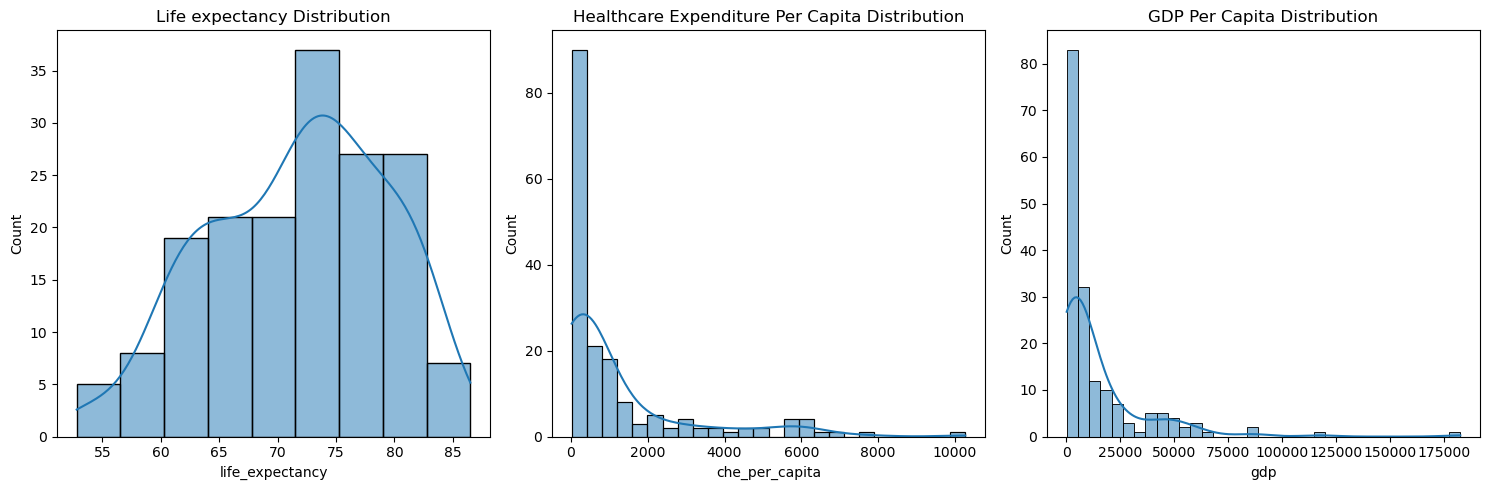

In [5]:
#
columns=['life_expectancy','che_per_capita','gdp']
titles=['Life expectancy Distribution','Healthcare Expenditure Per Capita Distribution','GDP Per Capita Distribution']
fig,axes=plt.subplots(1, 3, figsize=(15, 5))

for col,title,ax in zip(columns,titles,axes):
    sns.histplot(df[col],kde=True,ax=ax)
    ax.set_title(title)
    
    
plt.tight_layout()
plt.show()

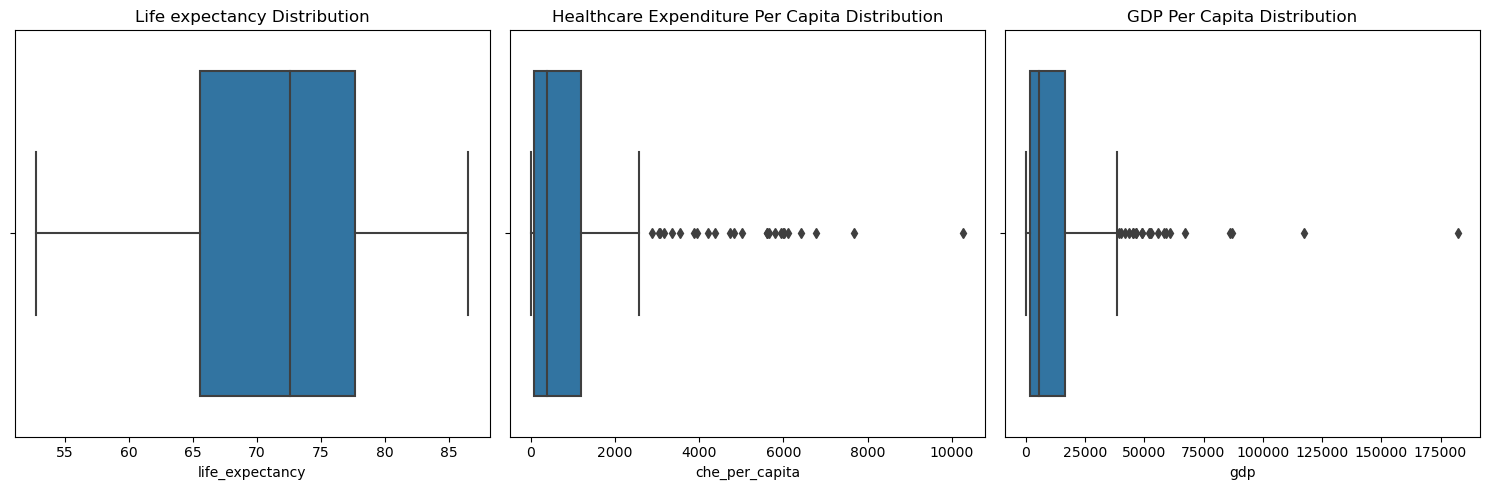

In [6]:
fig,axes=plt.subplots(1, 3, figsize=(15, 5))
for col,title,ax in zip(columns,titles,axes):
    sns.boxplot(x=df[col],ax=ax)
    ax.set_title(title)
    
plt.tight_layout()
plt.show()

In [7]:
corr_matrix=df.corr()
corr_matrix

C:\Users\ttgmo\AppData\Local\Temp\ipykernel_12496\363827394.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


,life_expectancy,healthcare_expenditure,gdp,che_per_capita
life_expectancy,1.000000,0.319345,0.638509,0.663989
healthcare_expenditure,0.319345,1.000000,0.203576,0.473719
gdp,0.638509,0.203576,1.000000,0.823119
che_per_capita,0.663989,0.473719,0.823119,1.000000


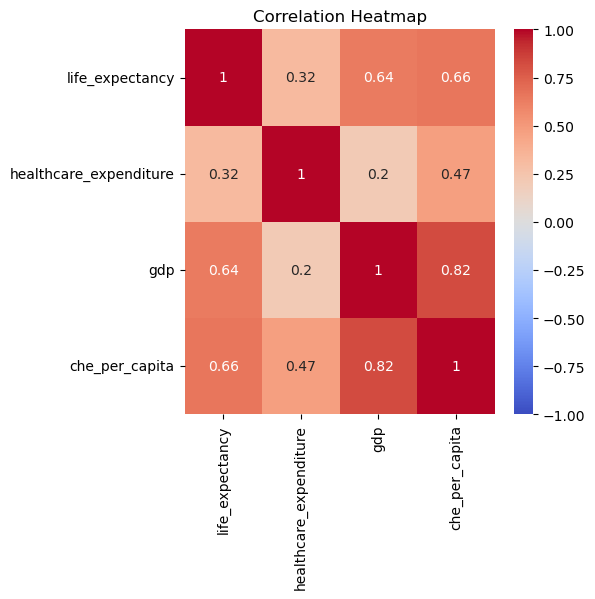

In [8]:
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Text(291.68, 86.5, 'r = 0.64')

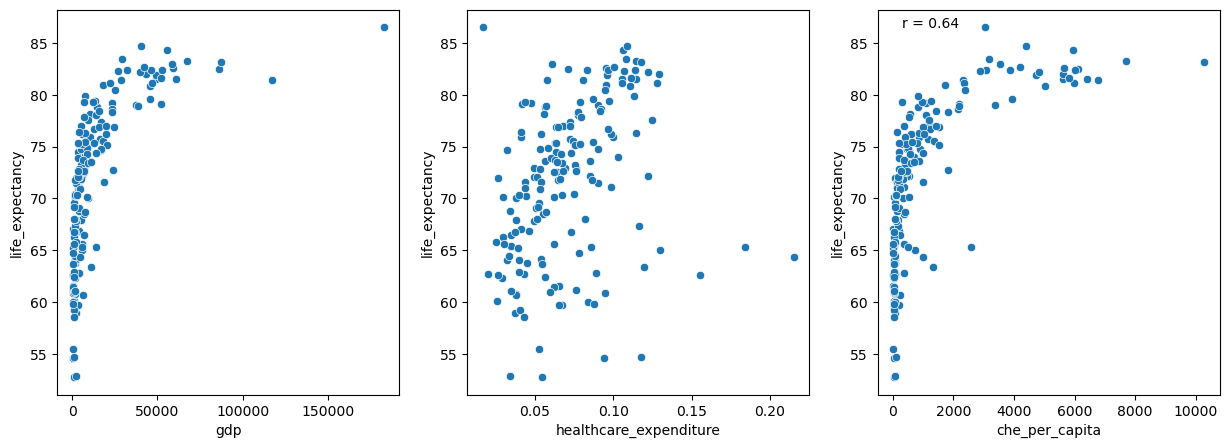

In [9]:
fig,axes=plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=df, x=df.gdp, y=df.life_expectancy,ax=axes[0])
sns.scatterplot(data=df, x=df.healthcare_expenditure, y=df.life_expectancy,ax=axes[1])
sns.scatterplot(data=df, x=df.che_per_capita, y=df.life_expectancy,ax=axes[2])
r, _ = pearsonr(df.gdp, df.life_expectancy)
plt.text(x=df.gdp.min(), y=df.life_expectancy.max(), s=f"r = {r:.2f}")


<Axes: xlabel='gdp', ylabel='life_expectancy'>

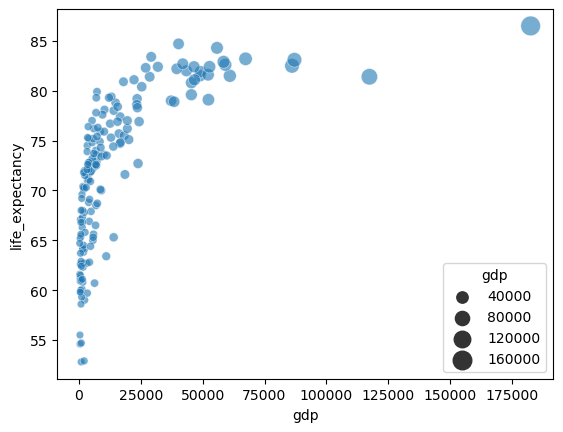

In [10]:
sns.scatterplot(data=df, x='gdp', y='life_expectancy', size='gdp', sizes=(30, 200), alpha=0.6)


In [11]:
# Creating bins for GPD Per Capita 
bin_ranges = [0, 1045, 4095, 12695, float('inf')]
bin_labels = ['Low-income', 'Lower-middle-income', 'Upper-middle-income', 'High-income']
df['Income_Group'] = pd.cut(df['gdp'], bins=bin_ranges, labels=bin_labels)
df

,country,life_expectancy,healthcare_expenditure,gdp,che_per_capita,Income_Group
0,Afghanistan,62.6,0.1553,516.87,80.27,Low-income
1,Albania,77.0,0.0680,5278.22,358.92,Upper-middle-income
2,Algeria,74.5,0.0632,3354.15,211.98,Lower-middle-income
3,Andorra,79.0,0.0905,37207.18,3367.25,High-income
4,Angola,62.3,0.0291,1639.95,47.72,Lower-middle-income
...,...,...,...,...,...,...
167,Uzbekistan,70.3,0.0675,1786.47,120.59,Lower-middle-income
168,Vanuatu,70.3,0.0397,2917.76,115.83,Lower-middle-income
169,Yemen,64.7,0.0780,291.68,22.75,Low-income
170,Zambia,62.4,0.0562,956.83,53.77,Low-income


<Axes: >

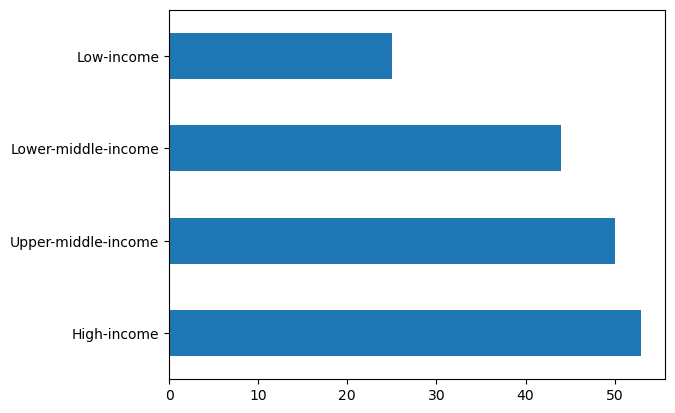

In [12]:
#Bar Chart of incomes as bins 
df['Income_Group'].value_counts().plot(kind='barh')

Text(0, 0.5, 'Life Expectancy')

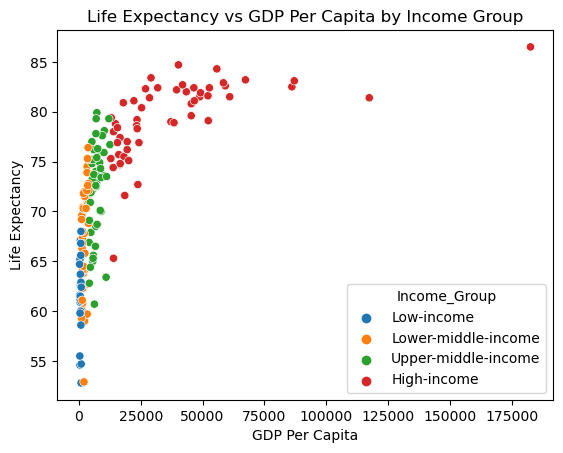

In [13]:
# How does life expectancy vary across countries with different income levels?
sns.scatterplot(data=df, x='gdp', y='life_expectancy',hue='Income_Group')
plt.title('Life Expectancy vs GDP Per Capita by Income Group')
plt.xlabel('GDP Per Capita')
plt.ylabel('Life Expectancy')


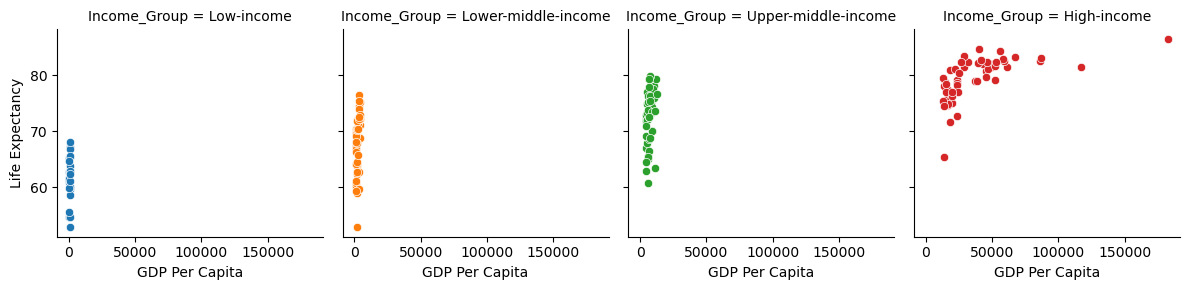

In [14]:
#FacetGrid of the Income 
g = sns.FacetGrid(df, col='Income_Group',hue='Income_Group')
g.map(sns.scatterplot, 'gdp', 'life_expectancy')
g.set_axis_labels('GDP Per Capita', 'Life Expectancy')



Text(17.95, 182537.3, 'Pearson r: 0.82')

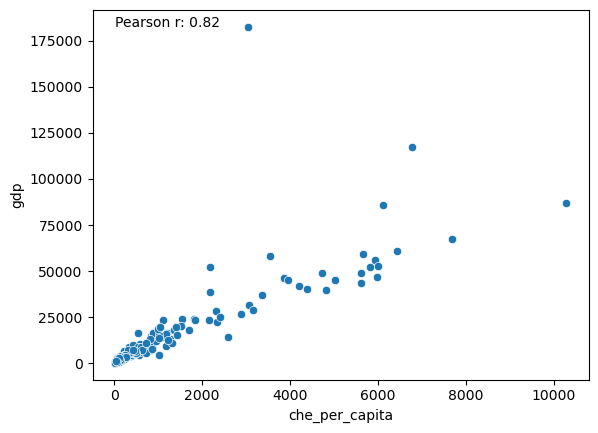

In [15]:
# What is the relationship between GDP per capita and current health expenditure per capita?
sns.scatterplot(df,x='che_per_capita',y='gdp')
r, _ = pearsonr(df.gdp, df.che_per_capita)
plt.text(df['che_per_capita'].min(), df['gdp'].max(), f'Pearson r: {r:.2f}')



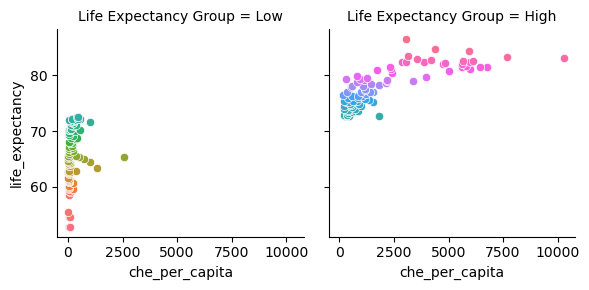

In [16]:
# How does the distribution of current health expenditure per capita differ between countries with low and high life expectancy?
# Using median
df.life_expectancy.median()
life_expectancy_bins=[0,72.55,100]
labels=['Low','High']
df['Life Expectancy Group']=pd.cut(df.life_expectancy,bins=life_expectancy_bins,labels=labels)
g=sns.FacetGrid(df, col='Life Expectancy Group',hue='life_expectancy')
g.map(sns.scatterplot,'che_per_capita','life_expectancy')

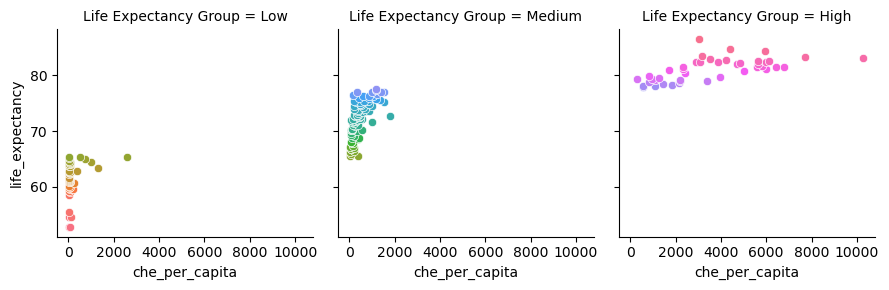

In [17]:
#using quartile ranges
q1=df.life_expectancy.quantile(0.25)
q3=df.life_expectancy.quantile(0.75)
labels=labels=['Low','Medium','High']
life_expectancy_bins=[0,65.55,77.64,100]
df['Life Expectancy Group']=pd.cut(df.life_expectancy,bins=life_expectancy_bins,labels=labels)
g=sns.FacetGrid(df, col='Life Expectancy Group',hue='life_expectancy')
g.map(sns.scatterplot,'che_per_capita','life_expectancy')

<Axes: xlabel='che_per_capita', ylabel='Life Expectancy Group'>

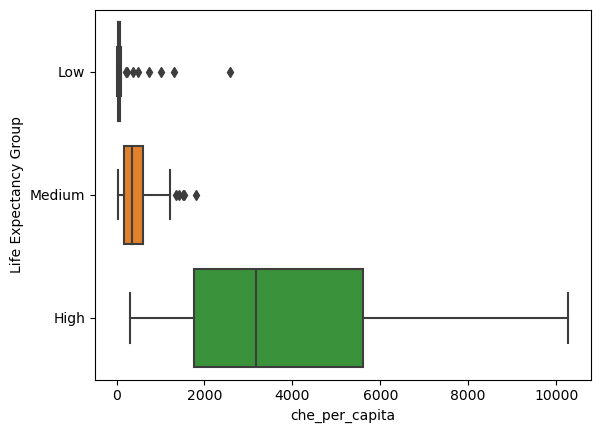

In [20]:
#Using boxplots to observe where are the outliers segmented in which groups
sns.boxplot(x='che_per_capita', y='Life Expectancy Group', data=df)

In [28]:
filtered_df = df[df['Life Expectancy Group'] == 'Low']
filtered_df

,country,life_expectancy,healthcare_expenditure,gdp,che_per_capita,Income_Group,Life Expectancy Group
0,Afghanistan,62.6,0.1553,516.87,80.27,Low-income,Low
4,Angola,62.3,0.0291,1639.95,47.72,Lower-middle-income,Low
18,Benin,60.1,0.0259,1240.73,32.13,Lower-middle-income,Low
24,Burkina Faso,59.7,0.0672,833.24,55.99,Low-income,Low
25,Burundi,61.6,0.0650,295.83,19.23,Low-income,Low
27,Cameroon,60.8,0.0377,1540.31,58.07,Lower-middle-income,Low
29,Central African Republic,54.6,0.0940,435.21,40.91,Low-income,Low
30,Chad,52.8,0.0541,895.75,48.46,Low-income,Low
34,Comoros,64.2,0.0535,1532.44,81.99,Lower-middle-income,Low
35,Congo,63.8,0.0447,1838.45,82.18,Lower-middle-income,Low


<Axes: xlabel='gdp', ylabel='life_expectancy'>

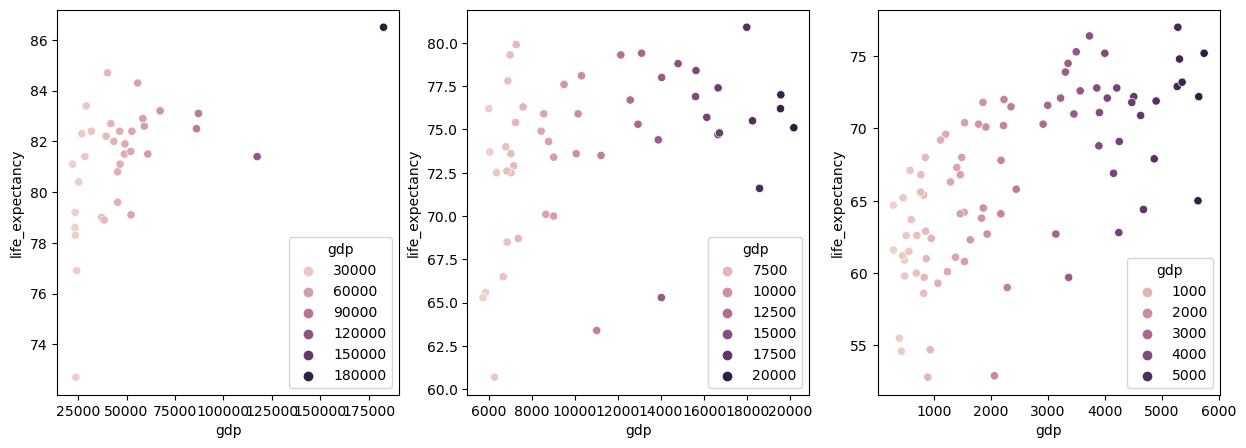

In [48]:
median_gdp = df["gdp"].median()

iqr = df["gdp"].quantile(0.75) - df["gdp"].quantile(0.25)  

low_gdp = df[df["gdp"] < median_gdp]
middle_gdp = df[(df["gdp"] >= median_gdp) & (df["gdp"] <= median_gdp + iqr)] 
high_gdp = df[df["gdp"] > median_gdp + iqr]

fig,axes=plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(high_gdp,x='gdp',y='life_expectancy',hue='gdp',ax=axes[0])
sns.scatterplot(middle_gdp,x='gdp',y='life_expectancy',hue='gdp',ax=axes[1])
sns.scatterplot(low_gdp,x='gdp',y='life_expectancy',hue='gdp',ax=axes[2])